In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task1:

* Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile.The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:
#### ['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable]

In [81]:
data_erg = pd.read_excel("En_In.xls")
data_erg = data_erg.drop(range(234, 282))
data_erg = data_erg.drop(range(17))
data_erg = data_erg.drop(columns=["Unnamed: 0", "Unnamed: 1"])
data_erg.columns = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"]
data_erg = data_erg.replace(["..."], np.NaN)
data_erg

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,321.0,10.0,78.669280
18,Albania,102.0,35.0,100.000000
19,Algeria,1959.0,51.0,0.551010
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9.0,121.0,88.695650
...,...,...,...,...
229,Ukraine18,4844.0,107.0,8.067312
230,United Arab Emirates,2710.0,300.0,0.000000
231,United Kingdom of Great Britain and Northern I...,7920.0,124.0,10.600470
232,United Republic of Tanzania,994.0,20.0,31.072840


## Task2:

* Convert ‘Energy Supply’ to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

In [82]:
data_erg["Energy Supply"] = data_erg["Energy Supply"] * 1_000_000
data_erg

,Country,Energy Supply,Energy Supply per Capita,% Renewable
17,Afghanistan,3.210000e+08,10.0,78.669280
18,Albania,1.020000e+08,35.0,100.000000
19,Algeria,1.959000e+09,51.0,0.551010
20,American Samoa,NaN,NaN,0.641026
21,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
229,Ukraine18,4.844000e+09,107.0,8.067312
230,United Arab Emirates,2.710000e+09,300.0,0.000000
231,United Kingdom of Great Britain and Northern I...,7.920000e+09,124.0,10.600470
232,United Republic of Tanzania,9.940000e+08,20.0,31.072840


## Task 3 &4:

* 3- Rename the following list of countries:"Republic of Korea": "South Korea","United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "UnitedKingdom","China, Hong Kong Special Administrative Region": "Hong Kong"
* 4-There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be ‘Bolivia’, ‘Switzerland17’ should be Switzerland’.

In [83]:
data_erg["Country"] = data_erg["Country"].replace(["Republic of Korea"], "South Korea")
data_erg["Country"] = data_erg["Country"].replace(["United States of America"], "United states")
data_erg["Country"] = data_erg["Country"].replace(["United Kingdom of Great Britain and Northern Ireland"], "United kingdom")
data_erg["Country"] = data_erg["Country"].replace(["China, Hong Kong Special Administrative Region"], "Hong Kong")

def correct_country_name(s):
    res = []
    for e in s:
        if e.isdigit():
            continue
        elif e == "(":
            break
        else:
            res.append(e)
    return "".join(res).rstrip()

data_erg["Country"] = data_erg["Country"].apply(lambda x: correct_country_name(x))
data_erg.loc[data_erg["Country"].isin(["American Samoa", "South Korea", "Bolivia"])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
20,American Samoa,NaN,NaN,0.641026
41,Bolivia,3.360000e+08,32.0,31.477120
181,South Korea,1.100700e+10,221.0,2.279353


## Task5:

* Next, load the GDP data from the file “gpd.csv”, which is a csv containing countries’ GDP from 1960 to 2015 from World Bank. Make sure to skip the header, and rename the following list of countries: "Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"

In [84]:
GDP_data = pd.read_csv("gpd.csv")
headers = list(GDP_data.loc[3])
headers[0] = "Country"
for i in range(4, len(headers)):
    headers[i] = int(headers[i])
GDP_data.columns = headers
GDP_data = GDP_data.drop([0, 1, 2, 3])
GDP_data["Country"] = GDP_data["Country"].replace(["Korea, Rep."], "South Korea")
GDP_data["Country"] = GDP_data["Country"].replace(["Iran, Islamic Rep."], "Iran")
GDP_data["Country"] = GDP_data["Country"].replace(["Hong Kong SAR, China"], "Hong Kong")

GDP.head(1)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [85]:
GDP[GDP["Country"] == "South Korea"]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
127,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.757696e+10,2.893825e+10,2.964966e+10,3.247578e+10,3.493136e+10,3.674434e+10,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


## Task6:

* Load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file “scimagojr.xlsx”, which ranks countries based on their journal contributions in the aforementioned area.

In [86]:
sci = pd.read_excel("scimagojr.xlsx")
sci

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


## Task7: 

* Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).
* The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']. You should obtain a DataFrame with 15 rows and 20 columns.

In [87]:
Results = pd.merge(sci, data_erg, how="left", on="Country")
Results = pd.merge(Results, GDP_data, how="left", on="Country")
Results = Results.set_index("Country")
Results = Results.astype({"Rank": int})
columns_to_drop = [x for x in range(1960, 2006)]
Results = Results.drop(columns=columns_to_drop)
Results = Results.drop(columns=["Country Code", "Indicator Code", "Indicator Name"])
Results = Results[:15]
Results

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,NaN,NaN,NaN,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [88]:
Results.head(3)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,NaN,NaN,NaN,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [89]:
Results.shape

(15, 20)

## Task8:

* Create a function to define what are the top 15 countries for average GDP over the last 10 years

In [90]:
years = (x for x in range(2006, 2016))
def task8():
    Results["avgGDP"] = Results[years].mean(axis=1, skipna=True)
    return Results["avgGDP"].sort_values(ascending=False)
print(task8())

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


## Task9:

* Create a function to define by how much had the GDP changed over the past 10 year for the country with the 5th largest average GDP

In [91]:
def task9():
    res1 = list(Results.sort_values("avgGDP", ascending=False).index.values)[4]
    return (res1, Results.loc[res1][2015] - Results.loc[res1][2006])

In [92]:
task9()

('France', 153345695364.24023)

## Task 10:

* Create a function to define what country has the maximum % Renewable and what is the percentage?

In [93]:
def task10():
    res1 = list(Results.sort_values("% Renewable", ascending=False).index.values)[0]
    return(res1, Results.loc[res1]["% Renewable"])

In [94]:
task10()

('Brazil', 69.64803)

## Task 11:

* Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the sixth most populous country according to this estimate

In [95]:
def task11():
    Results["Population"] = Results["Energy Supply"] / Results["Energy Supply per Capita"]
    Results
    res1 = list(Results["Population"].sort_values(ascending=False).index.values)[5]
    return (res1, Results.loc[res1]["Population"])


In [96]:
task11()

('Germany', 80369696.96969697)

## Task 12:

* Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

In [97]:
def task12():
    Results["CitPerCap"] =  Results["Citable documents"] / Results["Population"]
    return Results["Energy Supply per Capita"].astype('float64').corr(Results['CitPerCap'].astype('float64'), method="pearson")


In [98]:
task12()

0.8642899768854407

## Task 13:

* Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

In [99]:
def task13():
    temp = Results["% Renewable"].median(axis=0)
    Results["task13"] = Results.apply(lambda x: 1 if x["% Renewable"] >= temp else 0, axis=1)
    Results.sort_values(by='Rank')
    return Results["task13"]

In [100]:
task13()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: task13, dtype: int64

## Task 14:

* Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [101]:
def task14():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    temp = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
    Results['Population'] = Results['Energy Supply'] / Results['Energy Supply per Capita']
    for elem, val in Results.groupby(ContinentDict):
        temp.loc[elem] = [len(val), val['Population'].sum(),val['Population'].mean(),val['Population'].std()]
    temp = temp.astype({"size":int})
    return temp



In [102]:
task14()

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,3.940587e+08,7.881174e+07,3.813228e+07
North America,2,3.523986e+07,3.523986e+07,NaN
South America,1,2.059153e+08,2.059153e+08,NaN


## Task 15:

* Create a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2015 GDP, and the color corresponds to the continent

In [121]:
def task15():
    colors = ['blue', 'green', 'red'] * 5
    x, y = df["Rank"], df["% Renewable"]
    for i, text in enumerate(list(df.index)):
        plt.annotate(text, (x[i], y[i]))
    plt.scatter(x=x, y=y, s=df[2015] / 10000000000*7, alpha=0.4, c=colors)
    plt.xticks([i for i in range(0, len(list(df.index)) + 1)])
    plt.gcf().set_size_inches((15, 5))
    plt.show()

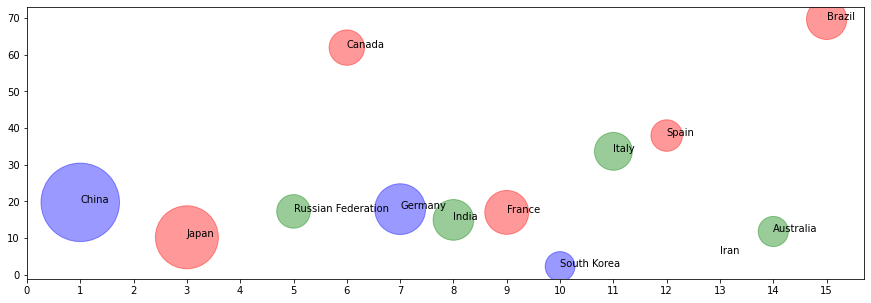

In [122]:
task15()